Q1. Explain the difference between greedy and non-greedy syntax with visual terms in as few words
as possible. What is the bare minimum effort required to transform a greedy pattern into a non-greedy
one? What characters or characters can you introduce or change?

- The greedy match will try to match as many repetitions of the quantified pattern as possible. The non-greedy match will try to match as few repetitions of the quantified pattern as possible.
- A greedy match means that the regex engine (the one which tries to find your pattern in the string) matches as many characters as possible.
- In other words, the greedy quantifiers give you the longest match from a given position in the string.
- As it turns out, all default quantifiers `?, *, +, {m}, and {m,n}` you’ve learned above are greedy: they “consume” or match as many characters as possible so that the regex pattern is still satisfied.

In [ ]:
import re
re.findall('a?', 'aaaa')

In [ ]:
re.findall('a*', 'aaaa')

In [ ]:
re.findall('a+', 'aaaa')

In [ ]:
re.findall('a{3}', 'aaaa')

In [ ]:
re.findall('a{1,2}', 'aaaa')

A non-greedy match means that the regex engine matches as few characters as possible—so that it still can match the pattern in the given string.

You can make the default quantifiers `?, *, +, {m}, and {m,n}` non-greedy by appending a question mark symbol `'?' to them: ??, *?, +?, and {m,n}?`. they “consume” or match as few characters as possible so that the regex pattern is still satisfied

In [ ]:
import re
re.findall('a?', 'aaaa')

In [ ]:
re.findall('a??', 'aaaa')

**Non-Greedy Asterisk Operator (*?)**

In [ ]:
re.findall('a*', 'aaaa')

In [ ]:
re.findall('a*?', 'aaaa')

In [ ]:
re.findall('a+', 'aaaa')

In [ ]:
re.findall('a+?', 'aaaa')

In [ ]:
##Difference between greedy and non-greedy
import timeit
timeit.timeit('import re;re.findall("a*", "aaaaaaaaaaaa")') #greedy approch

In [ ]:
import timeit
timeit.timeit('import re;re.findall("a*?", "aaaaaaaaaaaa")') #non-greedy approach

Q2. When exactly does greedy versus non-greedy make a difference?  What if you&#39;re looking for a
non-greedy match but the only one available is greedy?

- So the difference between the greedy and the non-greedy match is the following: The greedy match will try to match as many repetitions of the quantified pattern as possible. 
- The non-greedy match will try to match as few repetitions of the quantified pattern as possible.

- If I would have greedy match that I will use time and check the run time in compiler.

In [ ]:
import timeit
timeit.timeit('import re;re.search("a*", "aaaaaaaaaaaa")')

Q3. In a simple match of a string, which looks only for one match and does not do any replacement, is
the use of a nontagged group likely to make any practical difference?

- It is going to extract the substring from main string according to our desired pattern.
- But I always look for the starting string matching from the main string.

In [ ]:
string = '12333chssjabcccabcccdd1273273838'
import re
pattern = re.compile(r"[0-9]+")
obj=re.match(pattern,string)
print(obj.group())

Q5. Unlike a normal regex pattern, a look-ahead condition does not consume the characters it
examines. Describe a situation in which this could make a difference in the results of your
programme.

- It is that at the end of a lookahead or a lookbehind, the regex engine hasn't moved on the string. You can chain three more lookaheads after the first, and the regex engine still won't move. In fact, that's a useful technique.

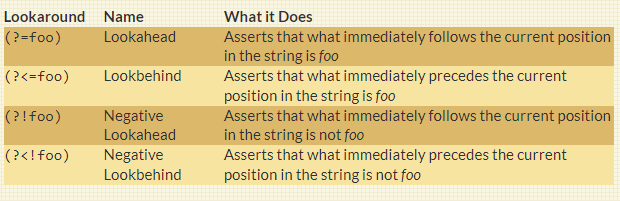

Let's get our feet wet right away with an expression that validates a password. The technique shown here will be useful for all kinds of other data you might want to validate (such as email addresses or phone numbers).
Our password must meet four conditions:

- 1. The password must have between six and ten word characters `\w`
- 2. It must include at least one lowercase character `[a-z]`
- 3. It must include at least three uppercase characters `[A-Z]`
- 4. It must include at least one digit `\d`


Our initial strategy (which we'll later tweak) will be to stand at the beginning of the string and look ahead four times—once for each condition. We'll look to check we have the right number of characters, then we'll look for a lowercase letter, and so on. If all the lookaheads are successful, we'll know the string is a valid password… And we'll simply gobble it all up with a plain `.*`

**Condition No.1**
- A string that is made of six-to-ten word characters can be written like this: `\A\w{6,10}\z`
- The `\A` anchor asserts that the current position is the beginning of the string. After matching the six to ten word characters, the `\z` anchor asserts that the current position is the end of the string.

- Within a lookahead, this pattern becomes `(?=\A\w{6,10}\z)`. This lookahead asserts: at the current position in the string, what follows is the beginning of the string, six to ten word characters, and the very end of the string.

- We want to make this assertion at the very beginning of the string. Therefore, to continue building our pattern, we want to anchor the lookahead with an `\A`. There is no need to duplicate the `\A`, so we can take it out of the lookahead. Our pattern becomes:
- Final :- `\A(?=\w{6,10}\z)`

**Condition No.2**

- For our second condition, we need to check that the password contains one lowercase letter. To find one lowercase letter, the simplest idea is to use `.*[a-z]`. That works, but the dot-star first shoots down to the end of the string, so we will always need to backtrack. Just for the sport, can we think of something more efficient? You might think of making the star quantifier reluctant by adding a ?, giving us `.*?[a-z]`, but that too requires backtracking as a lazy quantifier requires backtracking at each step.

- For this type of situation, I recommend you use something like `[^a-z]*[a-z]` (or even better, depending on your engine, the atomic `(?>[^a-z]*)[a-z]` or possessive version `[^a-z]*+[a-z]—`but we'll discuss that in the footnotes). The negated character class `[^a-z]` is the counterclass of the lowercase letter `[a-z]` we are looking for: it matches one character that is not a lowercase letter, and the `*` quantifier makes us match zero or more such characters. The pattern `[^a-z]*[a-z]` is a good example of the principle of contrast recommended by the regex style guide.

- Let's use this pattern inside a lookahead: `(?=[^a-z]*[a-z])`
- The lookahead asserts: at this position in the string (i.e., the beginning of the string), we can match zero or more characters that are not lowercase letters, then we can match one lowercase letter: `[a-z]`
- Final :- `\A(?=\w{6,10}\z)(?=[^a-z]*[a-z])`

**Condition No.3**

- For our third condition, we need to check that the password contains at least three uppercase letters. The logic is similar to condition 2: we look for an optional number of non-uppercase letters, then one uppercase letter… But we need to repeat that three times, for which we'll use the `quantifier {3}.`
- We'll use this lookahead: `(?=(?:[^A-Z]*[A-Z]){3})`

- The lookahead asserts: at this position in the string (i.e., the beginning of the string), we can do the following three times: match zero or more characters that are not uppercase letters (the job of the negated character class `[^A-Z] with the quantifier *)`, then match one uppercase letter: `[A-Z]`
- Our pattern becomes:
- Final :- `\A(?=\w{6,10}\z)(?=[^a-z]*[a-z])(?=(?:[^A-Z]*[A-Z]){3})`

- **Condition No.4**

- To check that the string contains at least one digit, we use this lookahead: `(?=\D*\d)`. Opposing `\d` to its counterclass `\D` makes good use of the regex principle of contrast.

- The lookahead asserts: at this position in the string (i.e., the beginning of the string), we can match zero or more characters that are not digits (the job of the `"not-a-digit"` character class `\D` and the `* quantifier)`, then we can match one digit:`\d`
- Our pattern becomes:
- `\A(?=\w{6,10}\z)(?=[^a-z]*[a-z])(?=(?:[^A-Z]*[A-Z]){3})(?=\D*\d)`

Q6. In standard expressions, what is the difference between positive look-ahead and negative look-
ahead?

**Positive Look Ahead**

- The positive lookahead construct is a pair of parentheses, with the opening parenthesis followed by a question mark and an equals sign. You can use any regular expression inside the lookahead (but not lookbehind, as explained below). Any valid regular expression can be used inside the lookahead.

**Positive Look Ahead**

- In this type of lookahead the regex engine searches for a particular element which may be a character or characters or a group after the item matched. If that particular element is not present then the regex declares the match as a match otherwise it simply rejects that match.

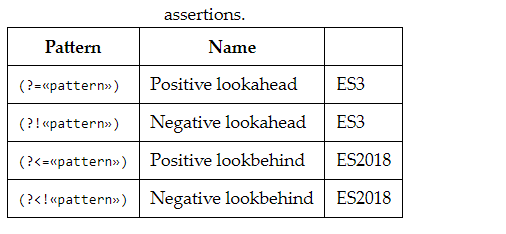

**Positive Look Ahead**

- Positive lookahead
- `(?=<lookahead_regex>)`

In [7]:

# importing regex
import re
  
# lookahead example
example = re.search(r'geeks(?=[a-z])', "geeksforgeeks")
  
# display output
print("Pattern:", example.group())
print("Pattern found from index:",
      example.start(), "to",
      example.end())

- Negative lookahead is opposite of lookahead. It is to assure that the search string is not followed by `<lookahead_regex>.`
- Negative Lookahead `(?!<lookahead_regex>)`.

In [8]:
# import required module
import re
  
# positive lookahead
example1 = re.search('geeks(?=[a-z])',
                     'geeksforgeeks')
print('Positive Lookahead:', example1.group())
  
# negative lookahead
example2 = re.search('geeks(?![a-z])',
                     'geeks123')
print('Negative Lookahead:', example2.group())

Q7. What is the benefit of referring to groups by name rather than by number in a standard
expression?

- This metacharacter sequence is similar to grouping parentheses in that it creates a group matching `<regex>` that is accessible through the match object or a subsequent backreference. The difference in this case is that you reference the matched group by its given symbolic `<name>` instead of by its number.

In [9]:
m = re.search('(\w+),(\w+),(\w+)', 'foo,quux,baz')
m.groups()

In [14]:
m.group(1, 2, 3) #by number 

In [17]:
#by name
m = re.search('(?P<w1>\w+),(?P<w2>\w+),(?P<w3>\w+)', 'foo,quux,baz')

m.group('w1')

In [18]:
m.group('w2') 

In [19]:
m.group('w3')

`(?P=<name>)`

- Matches the contents of a previously captured named group.

- The `(?P=<name>)` metacharacter sequence is a backreference, similar to `\<n>`, except that it refers to a named group rather than a numbered group.

Q8. Can you identify repeated items within a target string using named groups, as in &quot;The cow
jumped over the moon&quot;?

In [50]:
import re
string = 'The cow jumped over the moon'
pattern = re.findall(r'[eom]+?',string)
pattern

Q9. When parsing a string, what is at least one thing that the Scanner interface does for you that the
re.findall feature does not?

- `re.findall()`
- Return all non-overlapping matches of pattern in string, as a list of strings. The string is scanned left-to-right, and matches are returned in the order found.